In [1]:
# nominal values

R1 = 1.19e3
R2 = 2.17e3
R3 = 1e6
C  = 1e-6

function f( R1_param , R2_param , R3_param , C_param )
    k = R1_param / ( R1_param + R2_param )
    1 / ( C_param * 2 * R3_param * log( (1+k) / (1-k) ) )
end


f (generic function with 1 method)

In [2]:
# definisco le distribuzioni
using Distributions
dist1 = Normal( R1 , R1*0.05 )
dist2 = Normal( R2 , R2*0.05 )
dist3 = Normal( R3 , R3*0.05 )
distC = Normal( C , C*0.05 )
using Statistics, Printf, Plots

In [3]:
frequencies_final = [ f(rand(dist1),rand(dist2),rand(dist3),rand(distC)) for Θ in 1:1e5 ]
@printf( "%f\t%f" , mean(frequencies_final) , std(frequencies_final) )

0.679457	0.059205

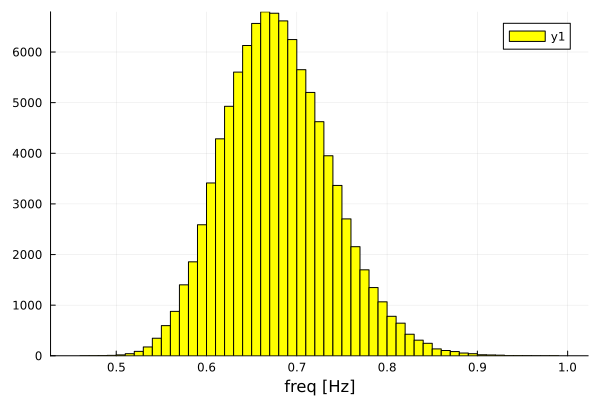

In [10]:
histogram( frequencies_final , bins = 80 , xlabel = "freq [Hz]" , color = :yellow )